In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd

In [40]:
routes = pd.read_csv('routes.txt')
trips = pd.read_csv('trips.txt')
stop_times = pd.read_csv('stop_times.txt')
stops = pd.read_csv('stops.txt')

In [42]:
pd.read_csv?

In [3]:
skytrain_routes = routes[routes['agency_id'] == 'SKYT']

In [4]:
skytrain_routes

,﻿route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
167,26497,SKYT,980,CANADA LINE SKYTRAIN,,2,http://infomaps.translink.ca/Public_Timetables...,,
168,26498,SKYT,996,MILLENNIUM SKYTRAIN,,2,http://infomaps.translink.ca/Public_Timetables...,,
171,26501,SKYT,999,EXPO SKYTRAIN,,2,http://infomaps.translink.ca/Public_Timetables...,,


In [5]:
stops[:10]

,﻿stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,5474,55421,NB KING GEORGE BLVD FS 88 AVE,KING GEORGE BLVD @ 88 AVE,49.163422,-122.845609,ZN 99,,0,NaN
1,5040,54988,NB KING GEORGE BLVD FS 96 AVE,KING GEORGE BLVD @ 96 AVE,49.177621,-122.845422,ZN 99,,0,NaN
2,5042,54990,KING GEORGE STN BAY 2,KING GEORGE STN @ BAY 2,49.183124,-122.845136,ZN 99,,0,NaN
3,5266,55214,EB 104 AVE FS WHALLEY BLVD,104 AVE @ WHALLEY BLVD,49.191475,-122.841080,ZN 99,,0,NaN
4,5268,55216,EB 104 AVE FS 140 ST,104 AVE @ 140 ST,49.191383,-122.833623,ZN 99,,0,NaN
5,5270,55218,EB 104 AVE FS 144 ST,104 AVE @ 144 ST,49.191438,-122.822383,ZN 99,,0,NaN
6,5272,55220,EB 104 AVE FS 148 ST,104 AVE @ 148 ST,49.191406,-122.811880,ZN 99,,0,NaN
7,5180,55128,GUILDFORD EXCHANGE BAY 1,GUILDFORD EXCHANGE @ BAY 1,49.191353,-122.803459,ZN 99,,0,NaN
8,5467,55414,NB KING GEORGE BLVD FS 76 AVE,KING GEORGE BLVD @ 76 AVE,49.141480,-122.845465,ZN 99,,0,NaN
9,5469,55416,NB KING GEORGE BLVD NS 80 AVE,KING GEORGE BLVD @ 80 AVE,49.147573,-122.845487,ZN 99,,0,NaN


In [32]:
def get_longest_trip(route_id):
    
    matching_trips = trips[trips['route_id'] == route_id]
    
    stop_times_merge = matching_trips.merge(stop_times, on='trip_id')
    
    t = stop_times_merge[['trip_id', 'stop_sequence']]
    
    longest_trip_id = t['trip_id'][t['stop_sequence'].argmax()]
    
    trip_stops = stop_times[stop_times['trip_id'] == longest_trip_id]
    
    #stop_merge = trip_stops.merge(stops, on='stop_id')
    
    return trip_stops

In [27]:
trip_stops

NameError: name 'trip_stops' is not defined

In [33]:
ts1 = get_longest_trip(26498)

In [45]:
stops.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8790, 8791, 8792, 8793, 8794, 8795, 8796, 8797, 8798, 8799],
           dtype='int64', length=8800)

In [44]:
stops.loc['stop_id']

KeyError: 'the label [stop_id] is not in the [index]'

In [37]:
stops.keys()

Index([u'﻿stop_id', u'stop_code', u'stop_name', u'stop_desc', u'stop_lat',
       u'stop_lon', u'zone_id', u'stop_url', u'location_type',
       u'parent_station'],
      dtype='object')

In [39]:
stops['stop_code']

0       55421
1       54988
2       54990
3       55214
4       55216
5       55218
6       55220
7       55128
8       55414
9       55416
10      55760
11      55411
12      61036
13      56644
14      56596
15      59227
16      58194
17      56421
18      56518
19      56519
20      56520
21      59079
22      59077
23      59076
24      59073
25      59072
26      59070
27      59068
28      59066
29      59064
        ...  
8770    60947
8771    60946
8772    60945
8773    60968
8774    60944
8775    60943
8776    60941
8777    60940
8778    60939
8779    60937
8780    60934
8781    60933
8782    60932
8783    54775
8784    60927
8785    60926
8786    54766
8787    54767
8788    54768
8789    54769
8790    54770
8791    54771
8792    54772
8793    54773
8794    54774
8795    60931
8796    54776
8797    54777
8798    60928
8799         
Name: stop_code, dtype: object

In [16]:
%debug

> /Users/richard/Projects/transit/pandas/hashtable.pyx(676)pandas.hashtable.PyObjectHashTable.get_item (pandas/hashtable.c:12216)()

ipdb> key
*** NameError: name 'key' is not defined
ipdb> y
*** NameError: name 'y' is not defined
ipdb> u
> /usr/local/lib/python2.7/site-packages/pandas/core/index.py(1759)get_loc()
   1758             key = _values_from_object(key)
-> 1759             return self._engine.get_loc(key)
   1760 

ipdb> 
> /usr/local/lib/python2.7/site-packages/pandas/core/internals.py(3211)get()
   3210             if not isnull(item):
-> 3211                 loc = self.items.get_loc(item)
   3212             else:

ipdb> d
> /usr/local/lib/python2.7/site-packages/pandas/core/index.py(1759)get_loc()
   1758             key = _values_from_object(key)
-> 1759             return self._engine.get_loc(key)
   1760 

ipdb> key
u'stop_id'
ipdb> c


In [67]:
ts2 = ts1.merge(stops, on='stop_id')

KeyError: 'stop_id'

In [68]:
np.unique(stops['stop_id'].asmatrix(), return_counts=True)

KeyError: 'stop_id'

In [66]:
ts1.keys()

Index([u'trip_id', u'arrival_time', u'departure_time', u'stop_id',
       u'stop_sequence', u'stop_headsign', u'pickup_type', u'drop_off_type',
       u'shape_dist_traveled'],
      dtype='object')

In [36]:
t = stm[['trip_id', 'stop_sequence']]

In [42]:
longest_trip_id = t['trip_id'][t['stop_sequence'].argmax()]

In [48]:
stop_times[stop_times['trip_id'] == longest_trip_id]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
633264,7248558,5:54:00,5:54:00,8039,1,NaN,0,0,NaN
633265,7248558,5:56:00,5:56:00,8040,2,NaN,0,0,0.6677
633266,7248558,5:57:00,5:57:00,8041,3,NaN,0,0,1.0555
633267,7248558,5:58:00,5:58:00,8042,4,NaN,0,0,1.7070
633268,7248558,6:00:00,6:00:00,8043,5,NaN,0,0,2.7576
633269,7248558,6:03:00,6:03:00,8044,6,NaN,0,0,5.4788
633270,7248558,6:06:00,6:06:00,8045,7,NaN,0,0,7.4913
633271,7248558,6:07:00,6:07:00,8046,8,NaN,0,0,8.3374
633272,7248558,6:09:00,6:09:00,8047,9,NaN,0,0,9.5751
633273,7248558,6:11:00,6:11:00,8048,10,NaN,0,0,11.2804


In [40]:
ts.argmax()

216

In [35]:
longest_trip = stm[['trip_id', 'stop_sequence']].groupby('trip_id').max()

,stop_sequence
trip_id,
7248404,29
7248405,29
7248406,29
7248407,29
7248408,29
7248409,29
7248410,29
7248411,29
7248412,29


In [32]:
ind, count = np.unique(stop_times['trip_id'].as_matrix(), return_counts=True)

In [31]:
np.unique?

In [33]:
count

array([25, 25, 25, ..., 20, 20, 20])

In [27]:
mt.shape

(1487, 8)

In [25]:
stm.shape

(41433, 16)

In [18]:
stop_times.shape

(2404888, 9)

In [17]:
stop_times[:10000].groupby('trip_id').max()

,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
trip_id,,,,,,,,
7206364,10:34:00,10:34:00,12040,25,NaN,1,0,6.2146
7206365,8:07:00,8:07:00,12040,25,NaN,1,0,6.2146
7206366,10:19:00,10:19:00,12040,25,NaN,1,0,6.2146
7206367,8:17:00,8:17:00,12040,25,NaN,1,0,6.2146
7206368,18:45:00,18:45:00,12040,25,NaN,1,0,6.2146
7206369,18:30:00,18:30:00,12040,25,NaN,1,0,6.2146
7206370,13:06:00,13:06:00,12040,25,NaN,1,0,6.2146
7206371,9:50:00,9:50:00,12040,25,NaN,1,0,6.2146
7206372,16:49:00,16:49:00,12040,25,NaN,1,0,6.2146


In [10]:
stop_times.max?

In [15]:
stop_times[:100]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,7206364,10:08:00,10:08:00,55,1,NaN,0,0,NaN
1,7206364,10:09:32,10:09:32,56,2,NaN,0,0,0.3092
2,7206364,10:10:30,10:10:30,57,3,NaN,0,0,0.5052
3,7206364,10:11:32,10:11:32,58,4,NaN,0,0,0.7143
4,7206364,10:12:27,10:12:27,59,5,NaN,0,0,0.9004
5,7206364,10:13:00,10:13:00,60,6,NaN,0,0,1.0071
6,7206364,10:13:43,10:13:43,61,7,NaN,0,0,1.1881
7,7206364,10:14:28,10:14:28,62,8,NaN,0,0,1.3772
8,7206364,10:14:52,10:14:52,63,9,NaN,0,0,1.4773
9,7206364,10:15:36,10:15:36,64,10,NaN,0,0,1.6603


In [47]:
pd.DataFrame.from_csv?

In [50]:
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,7206364,10:08:00,10:08:00,55,1,NaN,0,0,NaN
1,7206364,10:09:32,10:09:32,56,2,NaN,0,0,0.3092
2,7206364,10:10:30,10:10:30,57,3,NaN,0,0,0.5052
3,7206364,10:11:32,10:11:32,58,4,NaN,0,0,0.7143
4,7206364,10:12:27,10:12:27,59,5,NaN,0,0,0.9004
5,7206364,10:13:00,10:13:00,60,6,NaN,0,0,1.0071
6,7206364,10:13:43,10:13:43,61,7,NaN,0,0,1.1881
7,7206364,10:14:28,10:14:28,62,8,NaN,0,0,1.3772
8,7206364,10:14:52,10:14:52,63,9,NaN,0,0,1.4773
9,7206364,10:15:36,10:15:36,64,10,NaN,0,0,1.6603


In [55]:
stops = pd.read_csv('stops.txt', index_col=0)

In [12]:
stop_ids = stop_times[stop_times['trip_id'] == 7282759]['stop_id']

In [73]:
stops

,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
﻿stop_id,,,,,,,,,
5474,55421,NB KING GEORGE BLVD FS 88 AVE,KING GEORGE BLVD @ 88 AVE,49.163422,-122.845609,ZN 99,,0,NaN
5040,54988,NB KING GEORGE BLVD FS 96 AVE,KING GEORGE BLVD @ 96 AVE,49.177621,-122.845422,ZN 99,,0,NaN
5042,54990,KING GEORGE STN BAY 2,KING GEORGE STN @ BAY 2,49.183124,-122.845136,ZN 99,,0,NaN
5266,55214,EB 104 AVE FS WHALLEY BLVD,104 AVE @ WHALLEY BLVD,49.191475,-122.841080,ZN 99,,0,NaN
5268,55216,EB 104 AVE FS 140 ST,104 AVE @ 140 ST,49.191383,-122.833623,ZN 99,,0,NaN
5270,55218,EB 104 AVE FS 144 ST,104 AVE @ 144 ST,49.191438,-122.822383,ZN 99,,0,NaN
5272,55220,EB 104 AVE FS 148 ST,104 AVE @ 148 ST,49.191406,-122.811880,ZN 99,,0,NaN
5180,55128,GUILDFORD EXCHANGE BAY 1,GUILDFORD EXCHANGE @ BAY 1,49.191353,-122.803459,ZN 99,,0,NaN
5467,55414,NB KING GEORGE BLVD FS 76 AVE,KING GEORGE BLVD @ 76 AVE,49.141480,-122.845465,ZN 99,,0,NaN


In [78]:
dtype(stop_ids)

dtype('int64')

In [103]:
name_vec = []
lat_vec = []
lon_vec = []

for val in stop_ids.as_matrix():
#    print "value", val
    name_vec.append(stops.loc[val]['stop_name'])
    
    lat_vec.append(stops.loc[val]['stop_lat'])
    
    lon_vec.append(stops.loc[val]['stop_lon'])

In [105]:
lat = np.array(lat_vec)
lon = np.array(lon_vec)

lat_diff = lat[:, np.newaxis] - lat[np.newaxis, :]
lon_diff = lon[:, np.newaxis] - lon[np.newaxis, :]

dist = (lat_diff**2 * (np.sin(np.radians(49.0)) * lon_diff)**2)**0.5

In [120]:
latd = np.diff(lat)
lond = np.diff(lon) * np.sin(np.radians(49.0))

dist_stat = (latd**2 + lond**2)**0.5

In [121]:
dist_stat.shape

(19,)

In [123]:
dist_stat2 = np.concatenate(([0], np.cumsum(dist_stat)))

In [125]:
dist_mat = np.abs(dist_stat2[:, np.newaxis] - dist_stat2[np.newaxis, :])

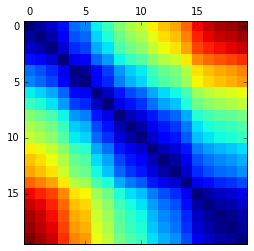

In [127]:
matshow(dist_mat)

In [129]:
dist_mat_km = dist_mat / 90.0 * 100.0 * 100.0

In [130]:
name_vec

['KING GEORGE STATION',
 'SURREY CENTRAL STATION',
 'GATEWAY STATION',
 'SCOTT ROAD STATION',
 'COLUMBIA STATION',
 'NEW WESTMINSTER STATION',
 '22ND STREET STATION',
 'EDMONDS STATION',
 'ROYAL OAK STATION',
 'METROTOWN STATION',
 'PATTERSON STATION',
 'JOYCE-COLLINGWOOD STATION',
 '29TH AVENUE STATION',
 'NANAIMO STATION',
 'COMMERCIAL-BROADWAY STATION PLATFORM 3',
 'MAIN STREET-SCIENCE WORLD STATION',
 'STADIUM-CHINATOWN STATION',
 'GRANVILLE STATION',
 'BURRARD STATION',
 'WATERFRONT STATION']

In [131]:
import json

In [133]:
data = {'stations':name_vec, 'distances':dist_mat_km.tolist()}

In [137]:
with open('transit_matrix.json', 'w') as f:
    json.dump(data, f)

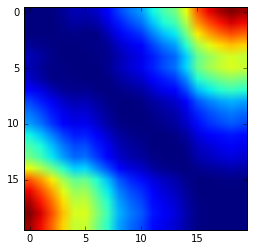

In [107]:
imshow(dist)

In [143]:
np.savetxt('distances.csv', dist_mat_km, delimiter=',')

In [141]:
np.savetxt?

In [136]:
json.dump?

In [100]:
stops.loc[5474]

stop_code                                 55421
stop_name         NB KING GEORGE BLVD FS 88 AVE
stop_desc             KING GEORGE BLVD @ 88 AVE
stop_lat                               49.16342
stop_lon                              -122.8456
zone_id                                   ZN 99
stop_url                                       
location_type                                 0
parent_station                              NaN
Name: 5474, dtype: object

In [106]:
dist

array([[  0.00000000e+00,   1.58154260e-05,   7.12843523e-05,
          4.81604473e-04,   1.02322035e-03,   9.56096199e-04,
          1.35924696e-03,   2.51418623e-03,   4.04641330e-03,
          5.13621326e-03,   5.95464583e-03,   7.85226113e-03,
          9.34709379e-03,   1.04427198e-02,   1.34628586e-02,
          1.74348081e-02,   1.92492421e-02,   2.05292662e-02,
          2.13217853e-02,   2.07718708e-02],
       [  1.58154260e-05,   0.00000000e+00,   1.94684310e-05,
          2.96489955e-04,   6.74144499e-04,   5.82170166e-04,
          8.03436159e-04,   1.87929153e-03,   3.24263504e-03,
          4.24322478e-03,   5.00503894e-03,   6.78490543e-03,
          8.19301454e-03,   9.22935527e-03,   1.21494603e-02,
          1.59366682e-02,   1.76921957e-02,   1.89295901e-02,
          1.96965285e-02,   1.91868848e-02],
       [  7.12843523e-05,   1.94684310e-05,   0.00000000e+00,
          9.80148871e-05,   2.47938834e-04,   1.17331565e-04,
          8.37938289e-05,   1.06367940e-03

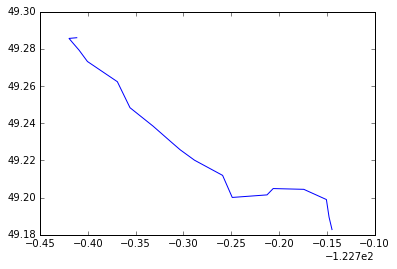

In [101]:
plot(lon_vec, lat_vec)

In [69]:
stop_ids.as_matrix()]

IndexError: indices are out-of-bounds

In [27]:
skyt = shapefile.Reader('SkyTrain/SkyTline')

In [30]:
skyt.shapes()

[<shapefile._Shape instance at 0x10f156320>,
 <shapefile._Shape instance at 0x10ec8a7a0>,
 <shapefile._Shape instance at 0x10ecb3050>,
 <shapefile._Shape instance at 0x10f1787a0>,
 <shapefile._Shape instance at 0x10f178248>,
 <shapefile._Shape instance at 0x10f178dd0>,
 <shapefile._Shape instance at 0x10f178320>,
 <shapefile._Shape instance at 0x10f178bd8>,
 <shapefile._Shape instance at 0x10f178638>,
 <shapefile._Shape instance at 0x10f178128>,
 <shapefile._Shape instance at 0x10f178440>]

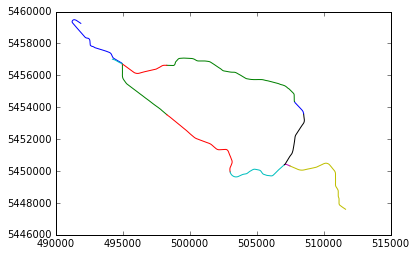

In [43]:
for shape in skyt.shapes():
    x, y = zip(*shape.points)
    plot(x, y)